In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [157]:
#EDA

In [158]:
df=pd.read_csv('adult.csv')

In [159]:
df.shape

(32561, 15)

In [124]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [160]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

# There is no null values present in the data set but there are values present as ' ?'

In [161]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [ ]:
#classiying it into categorical and numerical

In [73]:
columns=df.columns

In [74]:
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [75]:
#taking the numberical features from the data set

In [76]:
numerical=[features for features in columns if df[features].dtype!='O']

In [77]:
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

# classfing it based on contionous and discrete and categorical features

In [78]:
discrete_features=[features for features in numerical if len(df[features].unique())<=25]

In [79]:
continuous_features=[features for features in numerical if len(df[features].unique())>=25]

In [110]:
categorical=[features for features in columns if df[features].dtype=='O']

In [363]:
df2=pd.read_csv('adult.csv')

In [371]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [364]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [81]:
#plotting the discrete 

In [82]:
discrete_features

['education-num']

<AxesSubplot:xlabel='education-num', ylabel='count'>

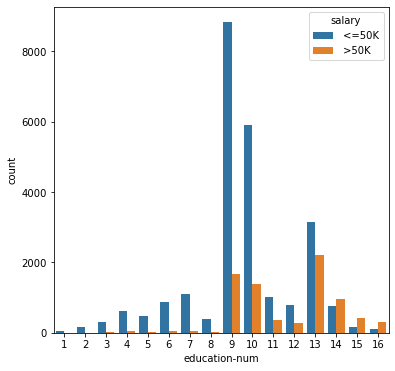

In [83]:
sns.countplot(x='education-num',hue='salary',data=df)

In [85]:
#Analysis:we can able to see the gaussian distrbution for the output features and more the education number  the salary <=50k


In [86]:
continuous_features

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

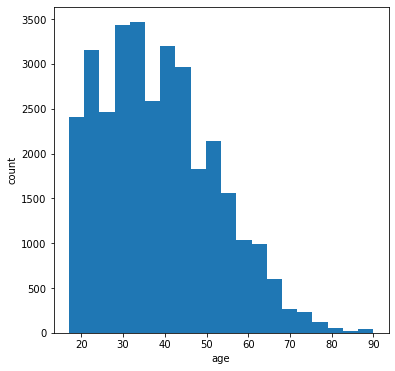

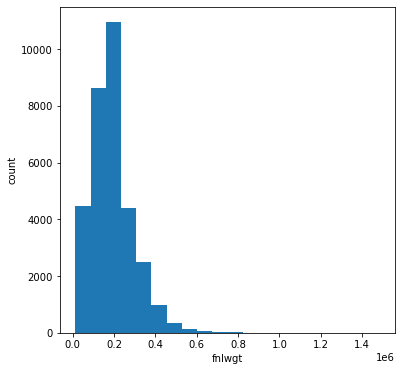

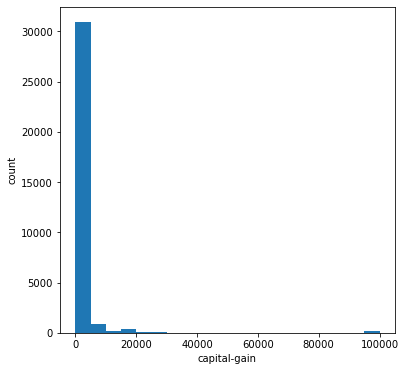

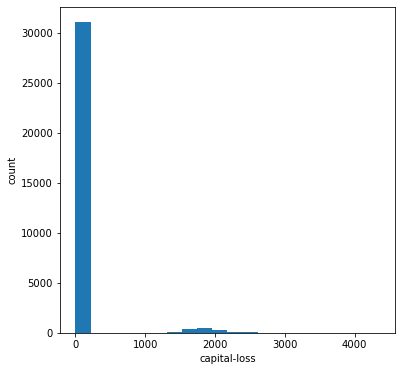

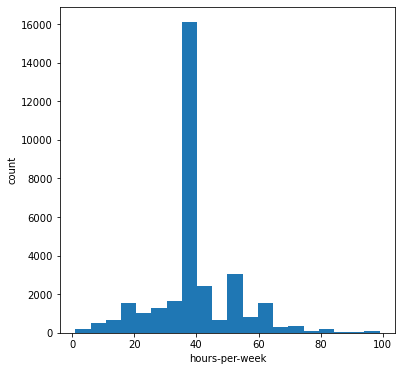

In [87]:
for i in continuous_features:
    plt.hist(x=i,bins=20,data=df)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()


In [ ]:
#'age':left skewed,'fnlwgt':right skewed','captial gain':'parot distribution','hours-per-week'

In [ ]:
#AS XGboost not sensitive outliers iam not going to deal the outliers

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

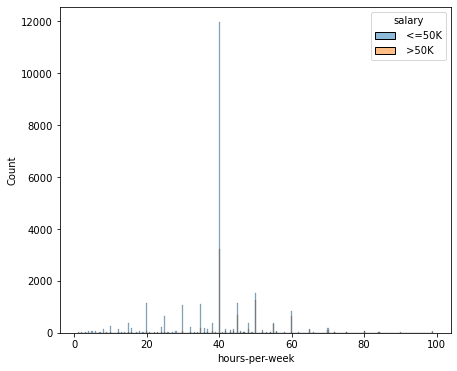

In [89]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,6)
sns.histplot(x=i,hue=df['salary'],data=df)

In [52]:
continuous_features


['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# feature_Engineering

In [ ]:
#can able to see some of the dataset is ' ?' for the below three occupation,'workclass','country'

In [ ]:
df['occupation'].mode()
df['workclass'].mode()
df['country'].mode()

In [162]:
df['occupation'].replace(' ?','Craft-repair' ,inplace=True)#replacing with mode

In [163]:
df['workclass'].replace(' ?','Private' ,inplace=True)#replacing with mode

In [164]:
df['country'].replace(' ?','United-States',inplace=True)#replacing with mode

In [146]:
df['country'].mode()

0     United-States
Name: country, dtype: object

In [165]:
df['salary']=df['salary'].map({ ' <=50K':0,' >50K':1})#getting dummies for the output features

In [ ]:
#categorical_feature

In [109]:
categorical

['workclass']

In [111]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [ ]:
#transforming the workclass,occupation,country

In [132]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

In [168]:
for i in categorical:
    one_hot = pd.get_dummies(df[i])
# Drop column as it is now encoded
    df= df.drop(i,axis = 1)
# Join the encoded df
    df= df.join(one_hot)

In [151]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,Federal-gov,Local-gov,Never-worked,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,United-States
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df.drop_duplicates(inplace=True)

In [154]:
df['salary']=df['salary'].map({ '<=50K':0,' >50K':1})

In [169]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,Federal-gov,Local-gov,Never-worked,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
X=df.drop('salary',axis=1)
y=df['salary']

In [ ]:
# splitting into Train test split

In [176]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [237]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
#hyperparameter tuning 

In [351]:
params = {
        
        'max_depth': [3, 4, 5,6,7],
        'learning_rate':[0.1,0.2,0.3,0.4,0.05,0.01]
    
        }
rf =xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = params)

In [352]:
train=grid_search.fit(X_train,y_train)

In [354]:
clf=train.predict(X_test)

In [355]:
from sklearn.metrics import f1_score

In [360]:
f1_score(y_test,clf)

0.7126833477135461

In [361]:
accuracy_score(y_test,clf)

0.872168905950096

In [362]:
confusion_matrix(y_test,abc)

array([[9254,  641],
       [1042, 2088]], dtype=int64)